## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from tqdm import tqdm
import random
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

## Show a example of the data

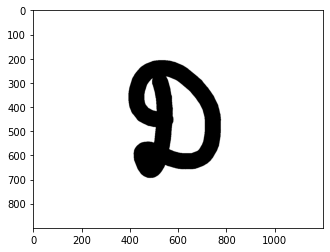

In [2]:
img = cv.imread("D:\College\Minor Project\Code\english handwritten characters dataset\Img\img014-027.png")
plt.imshow(img)


## Read the csv file, Print the first 5 rows

In [3]:
df = pd.read_csv(r'D:\College\Minor Project\Code\english handwritten characters dataset\english.csv')
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


## Explore the classes

In [4]:
classes = df['label'].unique()
print(f'\nThe Classes:\n {classes} ')


The Classes:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'] 


## Read the images

In [5]:
# Define the data path
DATADIR = "D:\College\Minor Project\Code\english handwritten characters dataset"         

# Read the csv file
dataset = pd.read_csv(DATADIR + '/english.csv')
# Get a 500 random values/rows
rand = random.sample(range(len(dataset)), 500)
# Make the random 500 as a validation data
validation_set = pd.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# Drop the 500 from the orignal data set
dataset.drop(rand, inplace=True)
# Get a 5 random rows/values from the validation set
rand = random.sample(range(len(validation_set)), 5)
# from the 5 random Create the test set 
test_set = pd.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# Drop the 5 from the validation set
validation_set.drop(rand, inplace=True)
# Show the validation set as a example
validation_set

,image,label
0,Img/img018-034.png,H
1,Img/img018-042.png,H
2,Img/img044-034.png,h
3,Img/img018-051.png,H
4,Img/img042-041.png,f
...,...,...
495,Img/img062-005.png,z
496,Img/img038-021.png,b
497,Img/img054-036.png,r
498,Img/img048-004.png,l


# Defining the Training, Test, validation dataframe

In [6]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=DATADIR, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=DATADIR, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=DATADIR, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 5 classes.


## Build the model

In [7]:
# Define the model
model = Sequential()

# Add first Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
# Add a relu Activation 
model.add(Activation('relu'))
# Add a second Convolutional Layer
model.add(Conv2D(32, (3, 3)))
# Add a relu Activation 
model.add(Activation('relu'))
# Add a Max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a Dropout layer
model.add(Dropout(0.25))

# Add third Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same'))
# Add a relu Activation 
model.add(Activation('relu'))
# Add Fourth Convolutional Layer
model.add(Conv2D(64, (3, 3)))
# Add a relu Activation 
model.add(Activation('relu'))
# Add a Max pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a Dropout Layer
model.add(Dropout(0.25))

# Add Fifth Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same'))
# Add a Activation Layer
model.add(Activation('relu'))
# Add a sixth Convolutional Layer
model.add(Conv2D(64, (3, 3)))
# Add a Activation Layer
model.add(Activation('relu'))
# Add a Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a Dropout Layer
model.add(Dropout(0.25))

# Add a Flatten Layer
model.add(Flatten())
# Add a Dense layer Layer
model.add(Dense(512))
# Add a Activation Layer
model.add(Activation('relu'))
# Add a Dropout Layer
model.add(Dropout(0.5))
# Add the Output Dense Layer
model.add(Dense(62, activation='softmax'))

# Compile the model
optimizer=keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## Train/Fit the model

In [8]:
# Train the model for 50 epochs
history = model.fit(training_data_frame, validation_data=validation_data_frame, epochs=50)

Epoch 1/50
91/91 [==============================] - 143s 2s/step - loss: 4.1315 - accuracy: 0.0096 - val_loss: 4.1286 - val_accuracy: 0.0202
Epoch 2/50
91/91 [==============================] - 84s 924ms/step - loss: 4.1280 - accuracy: 0.0172 - val_loss: 4.1276 - val_accuracy: 0.0141
Epoch 3/50
91/91 [==============================] - 87s 960ms/step - loss: 4.1274 - accuracy: 0.0151 - val_loss: 4.1245 - val_accuracy: 0.0222
Epoch 4/50
91/91 [==============================] - 94s 1s/step - loss: 4.1142 - accuracy: 0.0234 - val_loss: 4.0767 - val_accuracy: 0.0343
Epoch 5/50
91/91 [==============================] - 84s 928ms/step - loss: 3.9929 - accuracy: 0.0460 - val_loss: 3.7765 - val_accuracy: 0.0667
Epoch 6/50
91/91 [==============================] - 104s 1s/step - loss: 3.7596 - accuracy: 0.0969 - val_loss: 3.4632 - val_accuracy: 0.1455
Epoch 7/50
91/91 [==============================] - 104s 1s/step - loss: 3.5552 - accuracy: 0.1223 - val_loss: 3.2429 - val_accuracy: 0.1919
Epoch 8/

## Plot the result

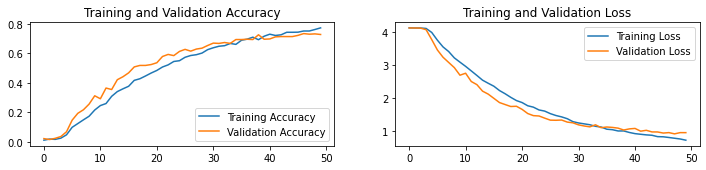

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the model

In [10]:
# Save the model as model.h5
model.save('model.h5')
# Load the model
model = load_model('model.h5')


Prediction Dict:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
Max index:  [2, 54, 57, 37, 17]


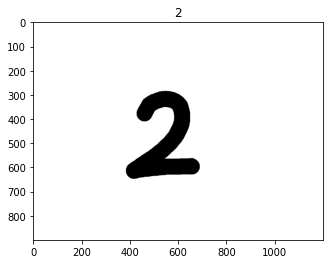

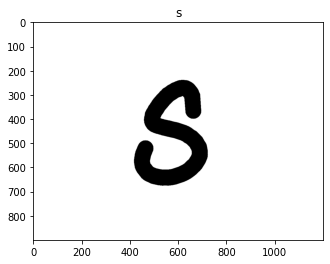

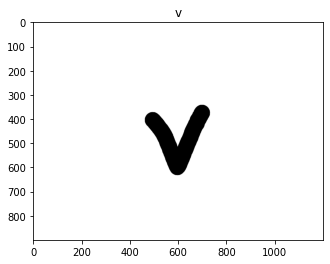

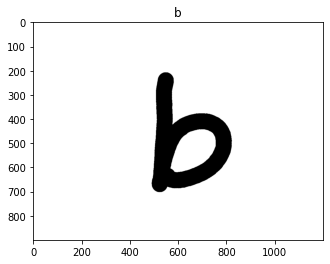

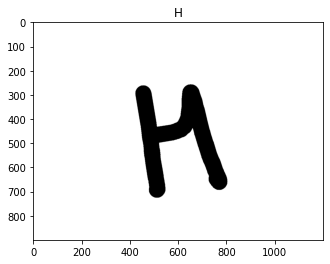

In [11]:
# Print the class indices 
print("Prediction Dict: ", training_data_frame.class_indices)
# Predict on the test data 
pred = model.predict(test_data_frame)
# Create a class/labels dictionary
classDict = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

# Make a data frame that contains the probability for each class
outputDf = pd.DataFrame(pred)
# Get the index of the max probability from the output Data frame
maxIndex = list(outputDf.idxmax(axis=1))
# Print the max index
print("Max index: ", maxIndex)
# Make a loop in range the length of the test data (5)
for i in range(len(test_set)):
    # Read the image 
    image = cv.imread(DATADIR + '/' + test_set.at[i, 'image'])
    # The title of the plot which is the predicted label
    plt.title(classDict.get(maxIndex[i], "error"))
    # Show the actual image
    plt.imshow(image)
    plt.show()